In [ ]:

##. Carga de datos
import pandas as pd
import numpy as np

path = '/Users/luissalamanca/Desktop/Fundamentos ML/csgo-analysis/data/01_raw/Anexo_ET_demo_round_traces_2022.csv' 

# Cargar datos
df = pd.read_csv(path, sep=';', low_memory=False)
df_orig = df.copy()
print('Copia original cargada:', df_orig.shape)

def show(df, name):
    print(f"{name}: {df.shape}")


FileNotFoundError: [Errno 2] No such file or directory: 'data/01_raw/Anexo_ET_demo_round_traces_2022.csv'

In [2]:
## 2. Eliminación de columnas irrelevantes
df_prep_1 = df_orig.copy()

columns_to_drop = [
    'Unnamed: 0', 'InternalTeamId',
    'TimeAlive', 'TravelledDistance',
    'TimeAlive_ns', 'TimeAlive_s_rel',
    'TravelledDistance_ns', 'TravelledDistance_s_abs'
]

df_prep_1 = df_prep_1.drop(columns=[c for c in columns_to_drop if c in df_prep_1.columns])
show(df_prep_1, 'Después de eliminar columnas irrelevantes')


Después de eliminar columnas irrelevantes: (79157, 26)


In [3]:
## 3. Imputación de valores faltantes en métricas de combate
combat_cols = ['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills']

df_prep_2 = df_prep_1.copy()
for col in combat_cols:
    df_prep_2[col] = df_prep_2[col].fillna(0).astype(int)

show(df_prep_2, 'Después de imputación de métricas de combate')


Después de imputación de métricas de combate: (79157, 26)


In [4]:
## 4. Conversión de tipos de datos
df_prep_3 = df_prep_2.copy()

# Mapear Team y Map como categorías
categorical_cols = ['Map', 'Team']
for cat in categorical_cols:
    df_prep_3[cat] = df_prep_3[cat].astype('category')

show(df_prep_3, 'Después de convertir tipos de datos')


Después de convertir tipos de datos: (79157, 26)


In [5]:
## 5. Preparar dataset final para regresión

print('Variables disponibles para modelar RoundKills:')
print(df_prep_3.columns.tolist())

target = 'RoundKills'

# Features candidatas (todas excepto el target y columnas de contexto identificador como MatchId, RoundId)
features = df_prep_3.drop(columns=['MatchId', 'RoundId', target])

# Mostrar dataset listo
show(features, 'Features finales para modelar')
print(f'Variable objetivo: {target}')


Variables disponibles para modelar RoundKills:
['Map', 'Team', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
Features finales para modelar: (79157, 23)
Variable objetivo: RoundKills


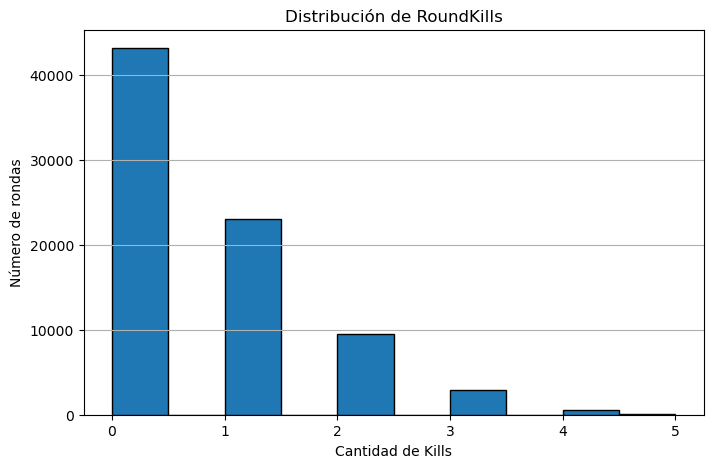

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_prep_3['RoundKills'], bins=10, edgecolor='black')
plt.title('Distribución de RoundKills')
plt.xlabel('Cantidad de Kills')
plt.ylabel('Número de rondas')
plt.grid(axis='y')
plt.show()


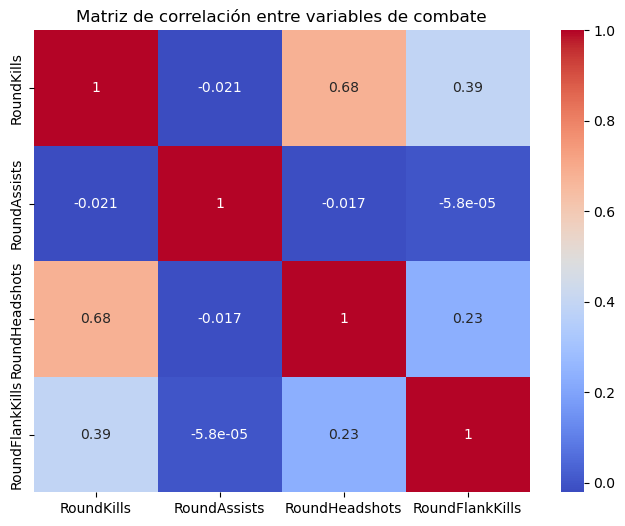

In [7]:
import seaborn as sns

# Calcular correlaciones numéricas
corr = df_prep_3[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills']].corr()

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables de combate')
plt.show()
